## On va débuter step by step 

### Inscription et récupération des données :

- Aller sur le site [Kaggle](https://www.kaggle.com) et inscrivez-vous
- Ensuite aller sur le contest du [Titanic](https://www.kaggle.com/c/titanic)
- Télécharger les données ```train.csv``` et ```test.csv``` dans [l'onglet data](https://www.kaggle.com/c/titanic/data)
- Mettez ces données dans un répertoire nommé ```input```

----------------------

Lancer votre notebook grâce à la commande dans votre terminal
```
jupyter notebook
```

In [2]:
# Importer les lib python
import pandas as pd

Petit rappel pour lire un fichier en local, utiliser la fonction ```read_csv```

Si vous avez des difficultés à utiliser une fonction, vous pouvez taper le nom de la fonction + "?" :
```
pd.read_csv?
```

*Pour fermer la fenêtre d'aide, cliquez sur la croix en haut à gauche de la fenêtre d'aide*

In [3]:
# Lire un fichier Train
train = pd.read_csv('input/train.csv')

Pour regarder un fichier, vous pouvez taper : 
    - le nom du DataFrame --> Afficher l'ensemble du DataFrame
    - Utiliser ".head()" --> Affiche les 5 premières lignes
    - Utiliser ".tail()" --> Affiche les 5 dernières lignes

In [4]:
# Regarder le début d'un DataFrame
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Signification des colonnes :
    - Survived : indique la mort ou la survie du passager pour les données d'apprentissage. C'est ce que l'on doit prédire sur fichier test. Cette valeur est booléene (0 ou 1) : 1 pour survie, 0 pour la mort
    - Pclass : La classe des chambres du navire (3 niveaux), 1 étant la meilleure classe et 3 la classe "éco". C'est une variable texte qui va falloir transformer en faisant attention car il y a une notion d'ordre.
    - Name : Nom de la personne
    - Sex : Sexe du passager
    - Age : âge du passager
    - SisbSp : (Sibling and Spouse) : le nombre de membres de la famille du passager de type frère, soeur, demi-frère, demi-soeur, époux, épouse...
    - Parch : (Parent and Child) : le nombre de membres de la famille du passager du type père, mère, fils, fille, beau-fils, etc...
    - Ticket : Numéro du ticket
    - Fare : le prix du ticket
    - Cabin : numéro de cabine
    - Embarked : le port d'embarquement du passager : C -> Cherbourg; Q -> Queenstown; S -> Southampton

In [6]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

**count()** permet de voir qu'il y a des données qui sont manquantes / absentes

## Faire un premier modèle simple :

On va crée un function python afin de faciler le reproduction par la suite

**Target** est donc notre cible (ce que l'on essaye de prédire')

In [96]:
def parse_model(X):
    """
    Parse mes données pour nourrir un algo.
    - Return :
        - X : features pour prédire le résutat
        - target : si la personne à survécu ou est morte
    """
    target = X.Survived
    X = X[['Fare', 'SibSp', 'Parch']]
    return X, target

In [97]:
X, y = parse_model(train.copy())

**X** sont nos données afin de déviner si le passager est mort ou non

In [98]:
X.head()

,Fare,SibSp,Parch
0,7.2500,1,0
1,71.2833,1,0
2,7.9250,0,0
3,53.1000,1,0
4,8.0500,0,0


**y** est la valeur booléen de survit ou non du Titanic

In [99]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [100]:
# Permet de valider notre modèle
from sklearn.cross_validation import cross_val_score, train_test_split

# Modèle linéaire
from sklearn.linear_model import LogisticRegression

In [101]:
# Etape 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [102]:
print"X_train : " + str(X_train.shape)
print"X_test : " + str(X_test.shape)
print"y_train : " + str(y_train.shape)
print"y_test : " + str(y_test.shape)

X_train : (668, 3)
X_test : (223, 3)
y_train : (668,)
y_test : (223,)


In [103]:
ma_regression = LogisticRegression() # On initialise notre algo

ma_regression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [104]:
ma_prediction = ma_regression.predict(X_test)
# ma_prediction est un array (= list)
ma_prediction[0:5] # On affiche les 5 premiers résultats

array([1, 0, 0, 1, 0])

In [105]:
# Mon score de précision sur mes données d'apprentissage
ma_regression.score(X_train, y_train)

0.67814371257485029

In [106]:
# Etape 2
# Function de score
from sklearn.metrics import accuracy_score

accuracy_score(y_test, ma_prediction)

0.63677130044843044

On peux voir en changeant le chiffre du paramêtre **random_state** de  **train_test_split** (étape 1) que le résultat du score sur les données d'apprentissage et sur les données test change

D'ailleurs l'étape 2 est égal : 

In [107]:
accuracy_score(y_train, ma_regression.predict(X_train))

0.67814371257485029

### Utilisation de la cross_validation (CV) :

La méthode de validation **Cross Validation** permet de prendre en entrée **X** (nos features) et **y** (survie ou mort) et d'entrainer un algo sur 4/5 du jeu de données et de tester (le score) sur 1/5.

In [108]:
from sklearn.cross_validation import cross_val_score
def cross_validation_score(algo, X, y):
    """
    Utilise une cross validation sur un algo et return tout ses scores
    """
    score_cv = cross_val_score(algo, X, y, cv=5)
    return score_cv

In [109]:
mon_score = cross_validation_score(ma_regression, X, y)

In [110]:
print "Voila le résultat de la CV " + str(mon_score)

Voila le résultat de la CV [ 0.59776536  0.74301676  0.66853933  0.6741573   0.68926554]


In [194]:
print "Voila la moyenne de la CV " + str(mon_score.mean())

Voila la moyenne de la CV 0.674548857768


### Submission :

Charger le fichier test :

In [215]:
test = pd.read_csv("input/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [132]:
# Etape 3
# On fit notre algo
ma_regression.fit(X, y)
use_features = ['Fare', 'SibSp', 'Parch']
prediction = ma_regression.predict(test[use_features])
# Error

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

**Il semble que nos données de test soient NaN (absentes)**

In [133]:
pd.isnull(test[use_features]).sum()

Fare     1
SibSp    0
Parch    0
dtype: int64

In [134]:
test[pd.isnull(test.Fare)][use_features]

,Fare,SibSp,Parch
152,NaN,0,0


On va donc remplacer cette valeur manquante : 
    - Soit on choisit une valeur subjective
    - On prend la valeur la plus adéquate sur notre jeux de données **train** (comme la médiane)

In [138]:
# Lib de calcul
import numpy as np

mediane_fare = np.median(train['Fare'])
print "La medianne de Fare dans notre jeu de données train est : " + str(mediane_fare)

La medianne de Fare dans notre jeu de données train est : 14.4542


Il faut donc remplacer la / les valeurs manquantes de **Fare** dans notre jeu de données **test** par la médiane calculé

In [142]:
test['Fare'] = test['Fare'].fillna(mediane_fare)
test[pd.isnull(test.Fare)][use_features] # Plus de Fare NaN

,Fare,SibSp,Parch


On reprendre notre étape 3 :

In [143]:
# Etape 3 bis
# On fit notre algo
ma_regression.fit(X, y)
use_features = ['Fare', 'SibSp', 'Parch']
test['Fare'] = test['Fare'].fillna(mediane_fare)   
prediction = ma_regression.predict(test[use_features])

In [144]:
print prediction

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 0 0 0 1 0 0 1 0 0 0]


In [145]:
# On ajoute notre prédiction sur notre jeux de données test
test['Survived'] = prediction
fichier_prediction = test[['PassengerId', 'Survived']]
fichier_prediction.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


**Créer un dossier "output" au même niveau que le dossier "input"**

In [149]:
# Ecrire un fichier à partir d'un DataFrame
fichier_prediction.to_csv('output/premier_test.csv', index=False)

Aller sur [Kaggle](https://www.kaggle.com/c/titanic/submissions/attach) et faite une submission afin de voir votre score :)

In [150]:
# 0.6555 est assez proche de notre CV

### Battre notre 1er modèle :

Comment faire mieux que notre premier modèle. Il faut garder en mémoire que l'on à utiliser seulement 3 features...

#### Etude de la features Pclass (classe des chambres)

In [157]:
# Pour afficher des images (pas besoin de taper cet import)
from IPython.display import Image
Image(url="http://i.giphy.com/9ABgKHIu3acWA.gif")

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt
# Pour que les graphique s'affichent dans le notebook
%matplotlib inline 


In [164]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


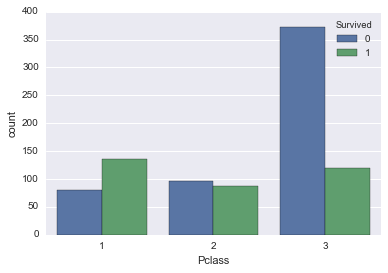

In [163]:
sns.countplot(train.Pclass, hue=train.Survived)

In [170]:
pd.get_dummies(train.Pclass, prefix="split_Pclass")

,split_Pclass_1,split_Pclass_2,split_Pclass_3
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
5,0.0,0.0,1.0
6,1.0,0.0,0.0
7,0.0,0.0,1.0
8,0.0,0.0,1.0
9,0.0,1.0,0.0


In [188]:
def parse_model_1(X):
    target = X.Survived
    X = X[['Fare', 'SibSp', 'Parch', 'Pclass']]
    mes_dummy = pd.get_dummies(train.Pclass, prefix="split_Pclass")
    X = X.join(mes_dummy)
    X = X.drop('Pclass', axis=1)
    return X, target

In [189]:
X, y = parse_model_1(train)

In [190]:
X.head()

,Fare,SibSp,Parch,split_Pclass_1,split_Pclass_2,split_Pclass_3
0,7.2500,1,0,0.0,0.0,1.0
1,71.2833,1,0,1.0,0.0,0.0
2,7.9250,0,0,0.0,0.0,1.0
3,53.1000,1,0,1.0,0.0,0.0
4,8.0500,0,0,0.0,0.0,1.0


In [191]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [192]:
mon_score_2 = cross_validation_score(ma_regression, X, y)

In [195]:
print "Voila la moyenne de la CV " + str(mon_score_2.mean())

Voila la moyenne de la CV 0.692659197308


In [196]:
# 1er score = 0.674

In [216]:
# On recherche notre jeu de données test
mon_test = pd.read_csv("input/test.csv")

In [217]:
# Etape 3 bis
ma_regression.fit(X, y)
use_features = [['Fare', 'SibSp', 'Parch', 'Pclass']]
mon_test = mon_test[['Fare', 'SibSp', 'Parch', 'Pclass']]
mes_dummy_test = pd.get_dummies(mon_test.Pclass, prefix="split_Pclass")
mon_test = mon_test.join(mes_dummy_test)
mon_test = mon_test.drop('Pclass', axis=1)
mon_test['Fare'] = mon_test['Fare'].fillna(mediane_fare)

In [218]:
mon_test.head()

,Fare,SibSp,Parch,split_Pclass_1,split_Pclass_2,split_Pclass_3
0,7.8292,0,0,0.0,0.0,1.0
1,7.0000,1,0,0.0,0.0,1.0
2,9.6875,0,0,0.0,1.0,0.0
3,8.6625,0,0,0.0,0.0,1.0
4,12.2875,1,1,0.0,0.0,1.0


In [219]:
prediction = ma_regression.predict(mon_test)

In [220]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0,

In [221]:
# On ajoute notre prédiction sur notre jeux de données test
test['Survived'] = prediction
fichier_prediction = test[['PassengerId', 'Survived']]
fichier_prediction.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [222]:
# Ecrire un fichier à partir d'un DataFrame
fichier_prediction.to_csv('output/dexieme_test.csv', index=False)

### Interpréter notre algo

In [226]:
ma_regression.coef_[0]

array([ 0.00669907, -0.150896  ,  0.23357229,  0.3730938 ,  0.100852  ,
       -0.85258357])

In [232]:
mon_resultat = pd.DataFrame({'coef' : ma_regression.coef_[0], 
                            'features' : mon_test.columns})
#mon_resultat['coef'] = ma_regression.coef_[0]
#mon_resultat['features'] = ['Fare', 'SibSp', 'Parch', 'Pclass']

In [233]:
mon_resultat

,coef,features
0,0.006699,Fare
1,-0.150896,SibSp
2,0.233572,Parch
3,0.373094,split_Pclass_1
4,0.100852,split_Pclass_2
5,-0.852584,split_Pclass_3


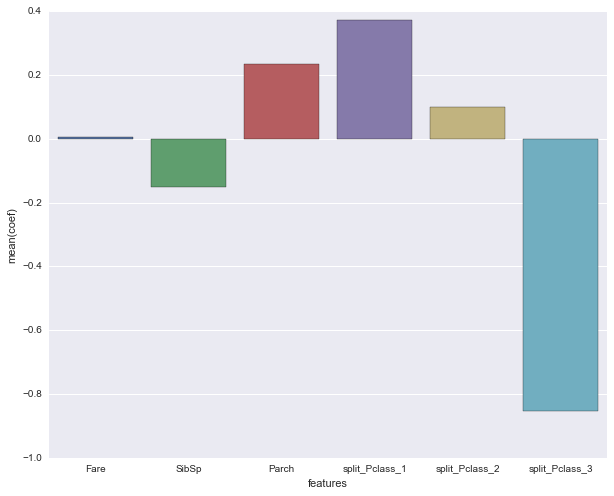

In [235]:
plt.figure(figsize=(10,8))
sns.barplot(x='features', y='coef', data=mon_resultat)

Un poid positif augmente la probalité de survie.
Un poid négatif diminue la probabilité de survie.